In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
def sort(lst, sort_by_y=False):
    if len(lst)==3:
        x, y, err = lst
    elif len(lst)==2:
        x, y = lst
        
    if not sort_by_y:
        p = x.argsort()
    else:
        p = y.argsort()
    x=x[p]
    y=y[p]
    if len(lst)==3:
        err=err[p]
    
    if len(lst)==3:
        return (x,y,err)
    elif len(lst)==2:
        return (x,y)

In [3]:
def make_interp(x,y):
    x,y = sort([x,y])
    x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
    spl = make_interp_spline(x, y, k=2) #BSpline object
    y_smooth = spl(x_new)
    return (x_new, y_smooth)

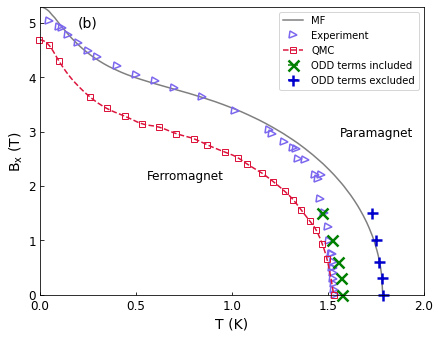

In [4]:
T, ronnow_exp = sort(np.genfromtxt(r'data\Babkevich_exp.txt',unpack=True),sort_by_y=True)
T_mf, ronnow_fit = sort(np.genfromtxt(r'data\Babkevich_mf_hf.txt',unpack=True))
Chakraborty_hf_x, Chakraborty_hf_y = sort(np.genfromtxt(r'data\Chakraborty_hf.txt',unpack=True))
plt.close()
fig=plt.figure(figsize=(6.22,4.8))



xnew = np.linspace(T_mf.min(),T_mf.max(),300) #300 represents number of points to make between T.min and T.max
spl = make_interp_spline(T_mf, ronnow_fit, k=2) #BSpline object
ronnow_fit_smooth = spl(xnew)

plt.plot(xnew,ronnow_fit_smooth,linestyle='-',mec='blue',color='C7',label='MF')

plt.plot(T,ronnow_exp,marker='>',mec='mediumslateblue',mew=1.5,ms=7,mfc='none', fillstyle='none', linestyle='none',label='Experiment',clip_on=False)

Chakraborty_hf_x_guide, Chakraborty_hf_y_guide = make_interp(Chakraborty_hf_x,Chakraborty_hf_y)
chakraborty_hf_plt = plt.plot(Chakraborty_hf_x_guide, Chakraborty_hf_y_guide, '--', color='crimson')
line=plt.plot(Chakraborty_hf_x, Chakraborty_hf_y, 's', fillstyle='none', label='QMC', color=chakraborty_hf_plt[0].get_color(),clip_on=False)

# with mechanism
res_w=np.array([[1.5735253431970313, 0.0003754630485703797, 0.0],
                [1.5668430770172581, 0.00040229584596061276, 0.3],
                [1.5528699011469382, 0.0004529928629107943, 0.6],
                [1.522578491832026, 0.0005086570723183535, 1.0],
                [1.4713199318011019, 0.0003732299749945284, 1.5]])

# without mechanism
res_wo = np.array([[1.7867525456894067, 0.0003346211519846263, 0.0],
                    [1.7800032022680978, 0.00035150234855617726, 0.3],
                    [1.7666844040658682, 0.0004942811009289669, 0.6],
                    [1.7502147228261784, 0.0005489117177605709, 1.0],
                    [1.7275073972460513, 0.0005268713490837303, 1.5]])


line1=plt.errorbar(res_w[:,0],res_w[:,2],xerr=res_w[:,1],marker='x',linestyle='none', mew=2.5,ms=11, label='ODD terms included', clip_on=False, color='green')
line2=plt.errorbar(res_wo[:,0],res_wo[:,2],xerr=res_wo[:,1],marker='+',linestyle='none', mew=2.5,ms=11, label='ODD terms excluded', clip_on=False, color='mediumblue')

plt.ylabel(r'$\mathrm{B_x}$ (T)',fontsize=14)
plt.xlabel(r'T (K)',fontsize=14)
# lgnd=plt.legend(markerscale=0.6,prop={'size': 10})
lgnd=plt.legend()
lgnd.legendHandles[2].set_linestyle('--')

ax=plt.gca()
ax.set_xlim([0,2])
ax.text(0.1, 0.93, '(b)', transform=ax.transAxes, fontsize=14)
ax.text(0.28, 0.4, 'Ferromagnet', transform=ax.transAxes, fontsize=12)
ax.text(0.78, 0.55, 'Paramagnet', transform=ax.transAxes, fontsize=12)
ax.locator_params(axis='x', nbins=6)
ax.tick_params(axis='x', which='major', labelsize=12, direction="in", pad=5)
ax.tick_params(axis='y', which='major', labelsize=12, direction="in")

plt.margins(0)

plt.tight_layout()
plt.show()

In [14]:
%matplotlib inline

In [5]:
fig.savefig(r'figures\phase_diagram_results.pdf',format='pdf')